In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')

In [2]:
stocks = ['AAPL', 'ATVI', 'MRNA', 'SPCE', 'TSLA']

In [3]:
dfs = [pd.read_csv(f'../data/{stocks[i]}/2021-06-01 - 2021-09-01.csv', index_col=0, parse_dates=['time'], dayfirst=True) for i in range(len(stocks))]
for index, stock in enumerate(stocks):
    dfs[index].name = stock
dfs[0].head()

,time,price
0,2021-06-01 04:00:00+00:00,125.00
1,2021-06-01 04:15:00+00:00,125.17
2,2021-06-01 04:30:00+00:00,125.20
3,2021-06-01 04:45:00+00:00,125.30
4,2021-06-01 05:00:00+00:00,125.38


In [4]:
test_size = 74
train = dfs[0][:-test_size]
test = dfs[0][-test_size:]

In [5]:
import models.OrbitETS as ets
model = ets.OrbitETS(date_col='time', response_col='price')

In [6]:
dfs[0]['time']

0      2021-06-01 04:00:00+00:00
1      2021-06-01 04:15:00+00:00
2      2021-06-01 04:30:00+00:00
3      2021-06-01 04:45:00+00:00
4      2021-06-01 05:00:00+00:00
                  ...           
4870   2021-08-31 21:30:00+00:00
4871   2021-08-31 21:45:00+00:00
4872   2021-08-31 22:00:00+00:00
4873   2021-08-31 22:15:00+00:00
4874   2021-08-31 22:30:00+00:00
Name: time, Length: 4875, dtype: datetime64[ns, UTC]

  0%|          | 0/5 [00:00<?, ?it/s]WARNING:pystan:Maximum (flat) parameter count (1000) exceeded: skipping diagnostic tests for n_eff and Rhat.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


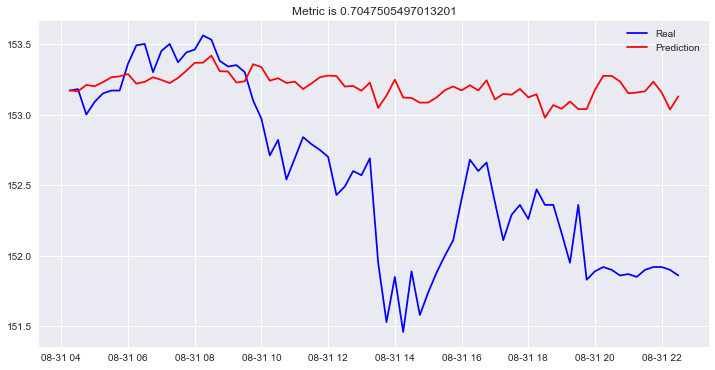

 20%|██        | 1/5 [00:06<00:26,  6.73s/it]WARNING:pystan:Maximum (flat) parameter count (1000) exceeded: skipping diagnostic tests for n_eff and Rhat.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


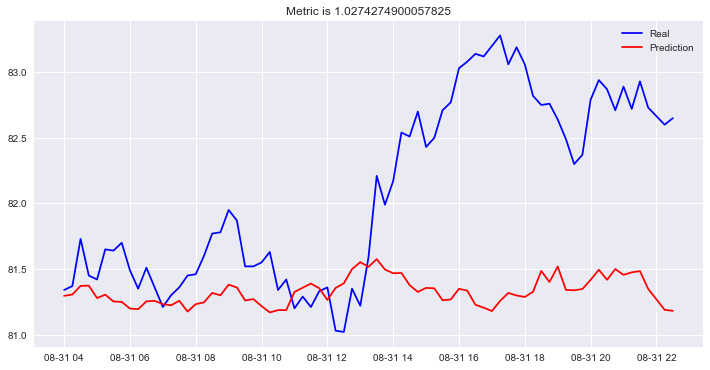

 40%|████      | 2/5 [00:10<00:14,  4.76s/it]WARNING:pystan:Maximum (flat) parameter count (1000) exceeded: skipping diagnostic tests for n_eff and Rhat.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


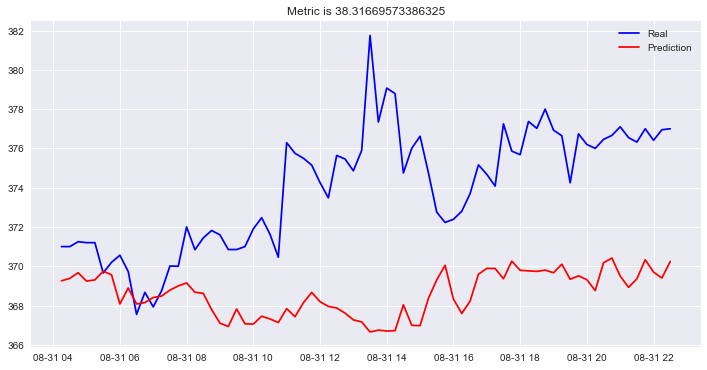

 60%|██████    | 3/5 [00:17<00:11,  5.91s/it]WARNING:pystan:Maximum (flat) parameter count (1000) exceeded: skipping diagnostic tests for n_eff and Rhat.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


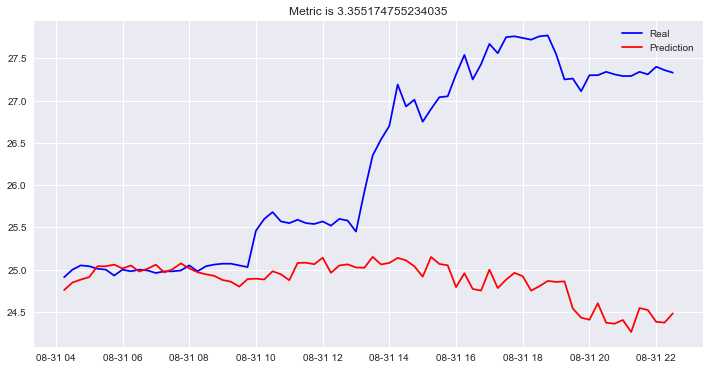

 80%|████████  | 4/5 [00:22<00:05,  5.59s/it]WARNING:pystan:Maximum (flat) parameter count (1000) exceeded: skipping diagnostic tests for n_eff and Rhat.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


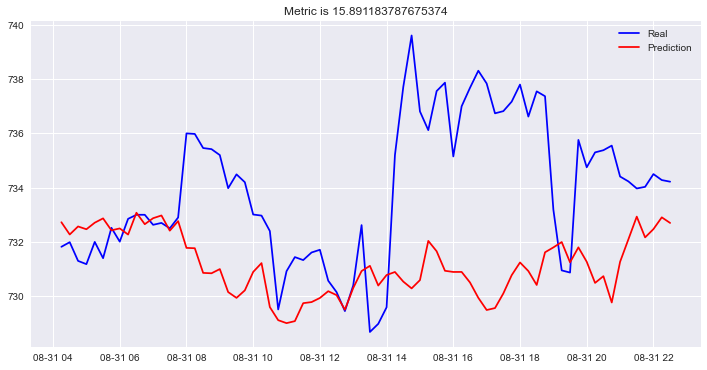

100%|██████████| 5/5 [00:30<00:00,  6.08s/it]


{'AAPL': 0.7047505497013201,
 'ATVI': 1.0274274900057825,
 'MRNA': 38.31669573386325,
 'SPCE': 3.355174755234035,
 'TSLA': 15.891183787675374}

In [7]:
from metrics import pipeline
pipeline(dfs, model)